# Marketing Analysis to target the countries that have specific characters with specific products (chicken/ ducks / turkey)
- by Data Analyst Hadi Shabeen



# Countries characters : 

1- politc_stab: political stability, violence , revolutions , terrorism..est

2- n_pop: number of population 

3- disp_alim: the availability of how much each person consume fat and protein

4- inflation	

5- deflator

6- chik_export	

7- chik_import	

# Note: 
the csv has been cleand and treated with EDA before doing this analysis

Moreover, if you want to conduct this project you can add more characters such as (country that have KFC/ Mcdonalds/ or any countries that have chicken as a primary or basic food

# Summary : you can click at any line to reach out the code block

* [Function for visualization](#chapter1)

* [Primary analysis](#chapter_2)
    * [Define the outliers](#section_2_1)
    * [Find a corrolation between the variables](#section_2_2)
    
* [PCA for dataset exploration](#chapter3)
    * [Perform PCA](#section_3_1)
    * [Component Scores](#section_3_2)
    * [Correlation Circle](#section_3_3)
    * [# Individuals Factor Map](#section_3_4)
    
   * [ K-means Clustring](#chapter4)
    * [Find the number of clusters](#section_1_4)
    * [Performing a K-means Clustering](#section_2_4)
    * [Visualize the k-means Clusters](#section_3_4)
    * [Parallel Coordinates Plot](#section_4_4)
    * [Countries that belong to each cluster  using dondrogram ](#section_5_4)

* [Hierarchical clustering](#chapter5)
    * [Performing a hierarchical clustering](#section_5_1)
    * [Visualize the hierarchical clusters ](#section_5_2)
    * [Interpreting the Meaning of  hierarchical Clusters](#section_5_3)
    * [#Box Plots ](#section_5_4_)
    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib . collections  import  LineCollection


from scipy.cluster.hierarchy import linkage,dendrogram

from scipy.cluster.hierarchy import linkage,fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas.plotting import parallel_coordinates
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
import statistics

from numpy.random import rand
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import random, timeit

from scipy import stats

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import sklearn

from sklearn import decomposition
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score



# Function for visualization <a class="anchor" id="chapter1"></a>

In [2]:

   
# Library of Functions for the OpenClassrooms Multivariate Exploratory Data Analysis Course




palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialize the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin , xmax , ymin , ymax  =  lims
            elif pcs.shape[1] < 30 :
                xmin , xmax , ymin , ymax  =  - 1 , 1 , - 1 , 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt . xlim ( xmin , xmax )
            plt . ylim ( ymin , ymax )
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialize the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt . legend ()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
   
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n

def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z ,
        labels = names,
        orientation = "left",
    )
    #plt.show()

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for  i  in  range ( num_clusters ):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for  i  in  range ( num_clusters ):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)  

#  Primary analysis  <a class="anchor" id="chapter2"></a>

In [3]:
data_ = pd.read_csv('data_treated_FAO.csv')
data_.head()

Code zone (FAO)         Zone  politc_stab         n_pop   inflation  \
0                1      Arm?nie       -27.61  0.000000e+00    0.000000   
1                1      Arménie         0.00  2.620632e+04    0.000000   
2                2  Afghanistan     -2561.13  3.293063e+07    0.000000   
3                3      Albanie       114.84  2.587332e+06    0.000000   
4                4  Afghanistan         0.00  0.000000e+00  667.476253   

     deflator   chik_export   chik_import    disp_alim  
0  12147.6220  1.420200e+04  2.126240e+05     0.000000  
1      0.0000  0.000000e+00  0.000000e+00    96.650000  
2  95860.9800  3.328000e+03  5.706428e+06  1714.880000  
3  87499.5453  9.298800e+04  1.267769e+07  8568.000000  
4      0.0000  3.335268e+07  3.312096e+07  3034.928804

In [4]:
data_.shape

(510, 9)

In [5]:
data_.isnull().sum()

Code zone (FAO)    0
Zone               0
politc_stab        0
n_pop              0
inflation          0
deflator           0
chik_export        0
chik_import        0
disp_alim          0
dtype: int64

In [6]:
data_.duplicated().sum()

0

In [7]:
data_.head()

Code zone (FAO)         Zone  politc_stab         n_pop   inflation  \
0                1      Arm?nie       -27.61  0.000000e+00    0.000000   
1                1      Arménie         0.00  2.620632e+04    0.000000   
2                2  Afghanistan     -2561.13  3.293063e+07    0.000000   
3                3      Albanie       114.84  2.587332e+06    0.000000   
4                4  Afghanistan         0.00  0.000000e+00  667.476253   

     deflator   chik_export   chik_import    disp_alim  
0  12147.6220  1.420200e+04  2.126240e+05     0.000000  
1      0.0000  0.000000e+00  0.000000e+00    96.650000  
2  95860.9800  3.328000e+03  5.706428e+06  1714.880000  
3  87499.5453  9.298800e+04  1.267769e+07  8568.000000  
4      0.0000  3.335268e+07  3.312096e+07  3034.928804

In [8]:
data_= data_.set_index('Zone')

In [9]:
data_.isnull().sum()

Code zone (FAO)    0
politc_stab        0
n_pop              0
inflation          0
deflator           0
chik_export        0
chik_import        0
disp_alim          0
dtype: int64

In [10]:
# Selecting the the dataset for PCA
X = data_[['politc_stab', 'n_pop',
           'inflation', 'deflator','chik_export',
           'chik_import', 'disp_alim']]
X


politc_stab         n_pop    inflation      deflator  \
Zone                                                                
Arm?nie       -27.610000  0.000000e+00     0.000000  1.214762e+04   
Arménie         0.000000  2.620632e+04     0.000000  0.000000e+00   
Afghanistan -2561.130000  3.293063e+07     0.000000  9.586098e+04   
Albanie       114.840000  2.587332e+06     0.000000  8.749955e+04   
Afghanistan     0.000000  0.000000e+00   667.476253  0.000000e+00   
...                  ...           ...          ...           ...   
Samoa           0.000000  0.000000e+00   254.502774  0.000000e+00   
Y?men           0.000000  0.000000e+00  1236.836936  0.000000e+00   
Zambie          0.000000  0.000000e+00  1249.314359  0.000000e+00   
?les F?ro?      4.451216  6.943644e+06  4704.869180  4.514212e+08   
Chine           4.451216  6.943644e+06  4704.869180  4.514212e+08   

              chik_export   chik_import    disp_alim  
Zone                                                  
Arm?nie      1.420200e+04  2.126240e+05     0.000000  
Arménie      0.000000e+00  0.000000e+00    96.650000  
Afghanistan  3.328000e+03  5.706428e+06  1714.880000  
Albanie      9.298800e+04  1.267769e+07  8568.000000  
Afghanistan  3.335268e+07  3.312096e+07  3034.928804  
...                   ...           ...          ...  
Samoa        3.335268e+07  3.312096e+07  3034.928804  
Y?men        3.335268e+07  3.312096e+07  3034.928804  
Zambie       3.335268e+07  3.312096e+07  3034.928804  
?les F?ro?   0.000000e+00  7.100000e+01     0.000000  
Chine        1.187010e+06  1.871118e+06     0.000000  

[510 rows x 7 columns]

In [11]:
X.isnull().sum()

politc_stab    0
n_pop          0
inflation      0
deflator       0
chik_export    0
chik_import    0
disp_alim      0
dtype: int64

In [12]:
X.duplicated().sum()

0

In [13]:
X.isnull().sum()

politc_stab    0
n_pop          0
inflation      0
deflator       0
chik_export    0
chik_import    0
disp_alim      0
dtype: int64

In [14]:
X.duplicated().sum()

0

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, Arm?nie to Chine
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   politc_stab  510 non-null    float64
 1   n_pop        510 non-null    float64
 2   inflation    510 non-null    float64
 3   deflator     510 non-null    float64
 4   chik_export  510 non-null    float64
 5   chik_import  510 non-null    float64
 6   disp_alim    510 non-null    float64
dtypes: float64(7)
memory usage: 31.9+ KB


In [16]:
df_x= X

In [17]:
df_x.describe()

politc_stab         n_pop     inflation      deflator   chik_export  \
count   510.000000  5.100000e+02  5.100000e+02  5.100000e+02  5.100000e+02   
mean      4.468671  6.970874e+06  4.723320e+03  4.531915e+08  5.042140e+07   
std     436.053274  5.360291e+07  9.950578e+04  1.019384e+10  2.992958e+08   
min   -2561.130000  0.000000e+00 -1.862553e+02  0.000000e+00  0.000000e+00   
25%       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  9.697500e+02   
50%       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  3.335268e+07   
75%       0.000000  3.480909e+05  2.873932e+02  6.863042e+04  3.335268e+07   
max    1243.440000  1.153625e+09  2.247366e+06  2.302103e+11  5.279139e+09   

        chik_import     disp_alim  
count  5.100000e+02    510.000000  
mean   5.007110e+07   4588.098251  
std    3.394493e+08   7735.835753  
min    0.000000e+00      0.000000  
25%    7.451100e+04    105.350000  
50%    3.312096e+07   3034.928804  
75%    3.312096e+07   3034.928804  
max    6.923442e+09  39508.560000

In [18]:
df_x.isnull().sum()

politc_stab    0
n_pop          0
inflation      0
deflator       0
chik_export    0
chik_import    0
disp_alim      0
dtype: int64

In [19]:
df_x.keys()

Index(['politc_stab', 'n_pop', 'inflation', 'deflator', 'chik_export',
       'chik_import', 'disp_alim'],
      dtype='object')

In [20]:
df_x.dtypes

politc_stab    float64
n_pop          float64
inflation      float64
deflator       float64
chik_export    float64
chik_import    float64
disp_alim      float64
dtype: object

In [21]:
df_x

politc_stab         n_pop    inflation      deflator  \
Zone                                                                
Arm?nie       -27.610000  0.000000e+00     0.000000  1.214762e+04   
Arménie         0.000000  2.620632e+04     0.000000  0.000000e+00   
Afghanistan -2561.130000  3.293063e+07     0.000000  9.586098e+04   
Albanie       114.840000  2.587332e+06     0.000000  8.749955e+04   
Afghanistan     0.000000  0.000000e+00   667.476253  0.000000e+00   
...                  ...           ...          ...           ...   
Samoa           0.000000  0.000000e+00   254.502774  0.000000e+00   
Y?men           0.000000  0.000000e+00  1236.836936  0.000000e+00   
Zambie          0.000000  0.000000e+00  1249.314359  0.000000e+00   
?les F?ro?      4.451216  6.943644e+06  4704.869180  4.514212e+08   
Chine           4.451216  6.943644e+06  4704.869180  4.514212e+08   

              chik_export   chik_import    disp_alim  
Zone                                                  
Arm?nie      1.420200e+04  2.126240e+05     0.000000  
Arménie      0.000000e+00  0.000000e+00    96.650000  
Afghanistan  3.328000e+03  5.706428e+06  1714.880000  
Albanie      9.298800e+04  1.267769e+07  8568.000000  
Afghanistan  3.335268e+07  3.312096e+07  3034.928804  
...                   ...           ...          ...  
Samoa        3.335268e+07  3.312096e+07  3034.928804  
Y?men        3.335268e+07  3.312096e+07  3034.928804  
Zambie       3.335268e+07  3.312096e+07  3034.928804  
?les F?ro?   0.000000e+00  7.100000e+01     0.000000  
Chine        1.187010e+06  1.871118e+06     0.000000  

[510 rows x 7 columns]

# Define the outliers <a class="anchor" id="section_2_1"></a>



In [22]:
# identify outliers with standard deviation
z_scores = stats.zscore(df_x)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_x[filtered_entries]

new_df


politc_stab         n_pop    inflation      deflator  \
Zone                                                                
Arm?nie       -27.610000  0.000000e+00     0.000000  1.214762e+04   
Arménie         0.000000  2.620632e+04     0.000000  0.000000e+00   
Albanie       114.840000  2.587332e+06     0.000000  8.749955e+04   
Afghanistan     0.000000  0.000000e+00   667.476253  0.000000e+00   
Alg?rie      -124.080000  0.000000e+00     0.000000  1.108060e+04   
...                  ...           ...          ...           ...   
Samoa           0.000000  0.000000e+00   254.502774  0.000000e+00   
Y?men           0.000000  0.000000e+00  1236.836936  0.000000e+00   
Zambie          0.000000  0.000000e+00  1249.314359  0.000000e+00   
?les F?ro?      4.451216  6.943644e+06  4704.869180  4.514212e+08   
Chine           4.451216  6.943644e+06  4704.869180  4.514212e+08   

              chik_export   chik_import    disp_alim  
Zone                                                  
Arm?nie      1.420200e+04  2.126240e+05     0.000000  
Arménie      0.000000e+00  0.000000e+00    96.650000  
Albanie      9.298800e+04  1.267769e+07  8568.000000  
Afghanistan  3.335268e+07  3.312096e+07  3034.928804  
Alg?rie      0.000000e+00  4.808000e+04     0.000000  
...                   ...           ...          ...  
Samoa        3.335268e+07  3.312096e+07  3034.928804  
Y?men        3.335268e+07  3.312096e+07  3034.928804  
Zambie       3.335268e+07  3.312096e+07  3034.928804  
?les F?ro?   0.000000e+00  7.100000e+01     0.000000  
Chine        1.187010e+06  1.871118e+06     0.000000  

[474 rows x 7 columns]

# Find a corrolation between the variables <a class="anchor" id="section_2_2"></a>

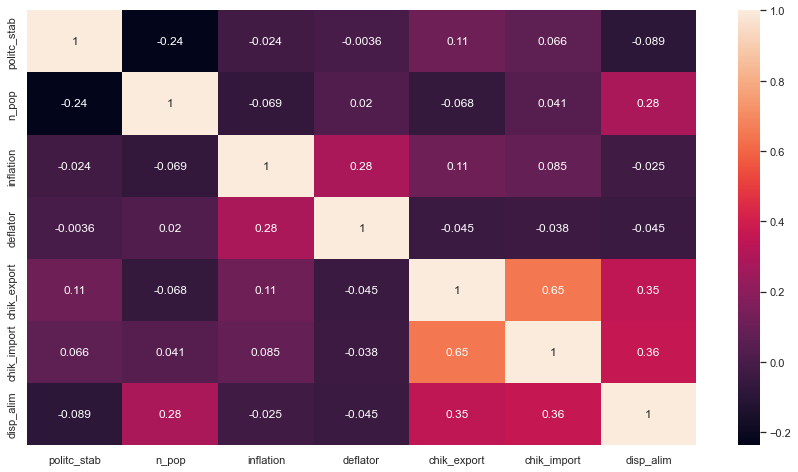

In [23]:
corrMatrix = new_df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()


Notes :

unsupervised leanring: 
- PCA: Reducing the number of variables 
- CLUSTRING :Finds groups of similar individuals


PCA:
- start by finding the mean point in the data
- PCA chooses a line that minimises the distance from all of our data points to the line.

# PCA for dataset exploration <a class="anchor" id="chapter3"></a>



In [24]:
# 1 scaling data

# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df)
X_scaled

array([[-0.15927398, -0.23452146, -0.33764773, ..., -0.70460498,
        -0.60436999, -0.69750072],
       [-0.07164859, -0.23249837, -0.33764773, ..., -0.70507139,
        -0.61023542, -0.67646014],
       [ 0.29281717, -0.03478383, -0.33764773, ..., -0.70201758,
        -0.26050979,  1.1677419 ],
       ...,
       [-0.07164859, -0.23452146,  0.90020204, ...,  0.39025949,
         0.30343635, -0.03680061],
       [-0.05752184,  0.30151605,  4.32404624, ..., -0.70507139,
        -0.61023346, -0.69750072],
       [-0.05752184,  0.30151605,  4.32404624, ..., -0.66608895,
        -0.55861893, -0.69750072]])

<AxesSubplot:ylabel='Density'>

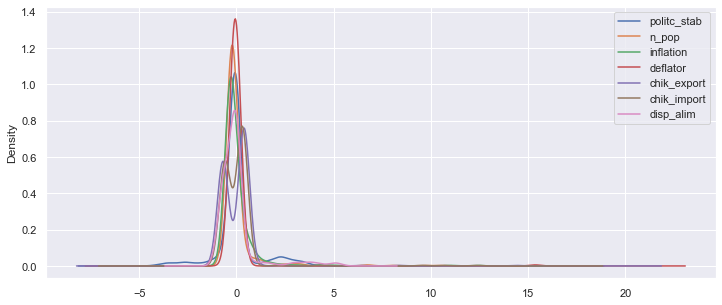

In [25]:
pd.DataFrame(X_scaled,columns=new_df.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,2))

- Note: 
- As we can see, all the distributions are now centered around the 0 value and have a similar spread. The variation in the data is still preserved,
- we can see that the shape of the density plot lines remains similar to the original plot for each variable).



# Perform PCA <a class="anchor" id="section_3_1"></a>



In [26]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 7

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)

PCA(n_components=7)

------------

# Analyse the results 
- - the first value is for pc1: -0.23, it has the highiest value beacuse it's the principal component that explains more the variance than the others, that's why it is the first
 the values drop fro pc2 , for pc3 and so one, the the last pc has very small explained variance ratio, it's been rounded to zero 



In [27]:
pca.explained_variance_ratio_.round(2)

array([0.28, 0.2 , 0.18, 0.12, 0.09, 0.08, 0.05])

--------------------------------------------

- we can express the explained variance ratio as a cumulative sum which is more useful  
- now we can read off the percentage variance explained as we add each principal component.
- e.g : the first pc which is 0.23  explain 23 %, then the first two 39 % and so on 

In [28]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.28, 0.48, 0.66, 0.78, 0.87, 0.95, 1.  ])

--------------

- We can plot the explained vaiance ratio and cumalitve sum in a scree plot

- explination : 
    -  the blue bars represent the explained variance ratio for each principal component 
    - the red line represents the cumulative sum of blue bars.
    
    - the first red point explain the first blue bar, the second red point explain the first two blue bars and so on.
    - we can use to read off the number of principal components we need to achieve a certain explained variance for example to explain 80% of variance we need just(5 principal components), this illustrates the power of PCA where we can reduce the number of variables from 8 to 5  while we sitll retaining over 80% of the information contained withing the original data, 
- one of the key things the secree plot used for is to help determin how many principal components to attain, when we moved on to perform further analysis of the data.

- the point of pca is to reduce dimensions so we do not want to keep all 8 PC's, we can just read of the number of principal componenets we need to achive the desired level of explained variance So we may decide to keep the (4) that explain 82 % variance and discard the other 4 variables.

- the explained variance and scree plotsare the most important aspects to understand when analyzing PCA results, and once we have decided on the number of principal components to keep, we can poceed to our next stage of data analysis for example , we can now use these principal components for building a classification or regression model 

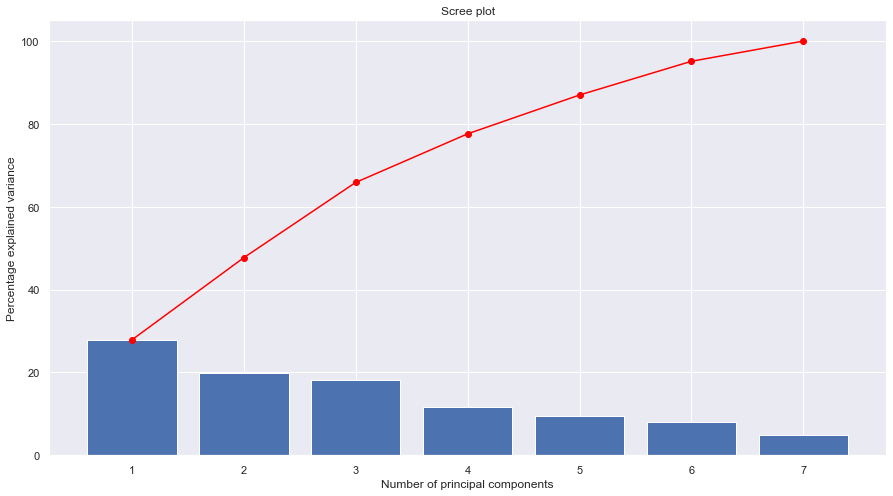

In [29]:
display_scree_plot(pca)

-----------------


# Component Scores  <a class="anchor" id="section_3_2"></a>


- From the pca object generated, we can also get the components, which is defined in the Sklearn documentation as "Principal axes in feature space, representing the directions of maximum variance in the data":



In [30]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]
# etc

In [31]:
new_df.columns

Index(['politc_stab', 'n_pop', 'inflation', 'deflator', 'chik_export',
       'chik_import', 'disp_alim'],
      dtype='object')

In [32]:
pc1

array([ 0.0361807 ,  0.11112101,  0.0893183 , -0.04723624,  0.60365486,
        0.61422778,  0.48420976])

In [33]:
pc2

array([-0.51822465,  0.63453438, -0.3383166 , -0.21070717, -0.21039291,
       -0.1101534 ,  0.33697887])

In [34]:
pc3

array([-0.3207592 ,  0.23611774,  0.61934734,  0.67048363, -0.06684851,
       -0.03581328,  0.04971123])

- So in the above the first variable is Chicken Price.  
For PC1 chicken price scores 0.036, 

- for Chicken Price  scores -0.27.  ClearlyChicken Price is more influential on PC1 than PC2.


---------------

# Correlation Circle <a class="anchor" id="section_3_3"></a>




- Individuals Factor Map

- We can plot these component scores on a correlation circle (sometimes called a variables factor map) chart to make them easier to digest. Each plot is drawn on a factorial plane, that is the vector space made up of the intersection of two of the principal components.  First, we plot the component scores of PC1 against PC2:



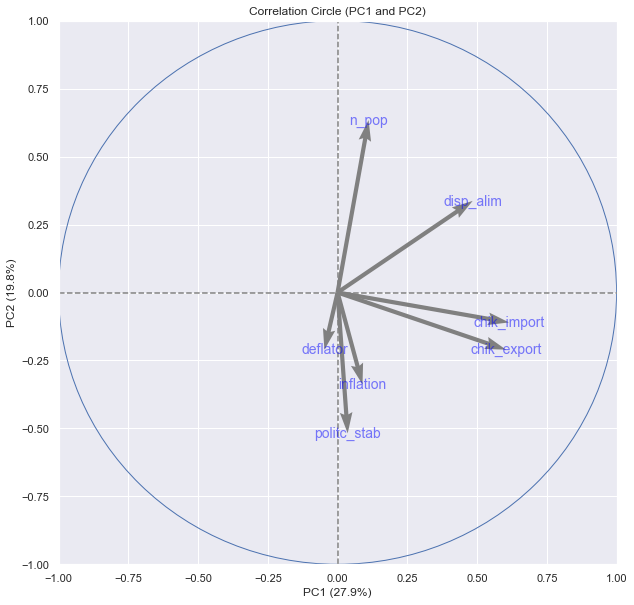

In [35]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(new_df.columns),)

- My notes

- We have a circle of radius 1. The horizontal axis represents principal component 1.

- The vertical axis represents principal component 2. 
- Inside the circle, we have arrows pointing in particular directions. Some of the arrows are longer than others.

- The length of the arrows represents how much that variable explains the variance of the data on the factorial plane. Sometimes we call this the quality of representation of that variable on the plane.

- The angle between variables provides an indication of how well the variables are correlated on the factorial plane.

- A small angle indicates that the representation of the two variables on the factorial plane are positively correlated. Above we see chiken importation  have and GDP Deflator on this factorial plane.

- An angle of 90 degrees indicates no correlation.  Above we can see that the food inflation and and chiken importation  are positively correlated on this factorial plane.

- An angle of 180 degrees indicates a negative correlation.  So food inflation and chiken exportation are strongly negatively correlated on this factorial plane.

- But as well as  angle between the lines does not give you a measure of the correlation between the original variables.  We have to bear in mind that the data has been projected onto this factorial plane.  Thus we are really only seeing a measure of correlation on the factorial plane, not in the original data.

- If, however, i  think i  see highly correlated (or uncorrelated) variables on the circle, then calculate their (correlation coefficients independently to verify)

- Very practical representation that gives all the correlation coefficients of the variables two by two. It's called the (Correlation Matrix). We can also plot other factorial planes.  

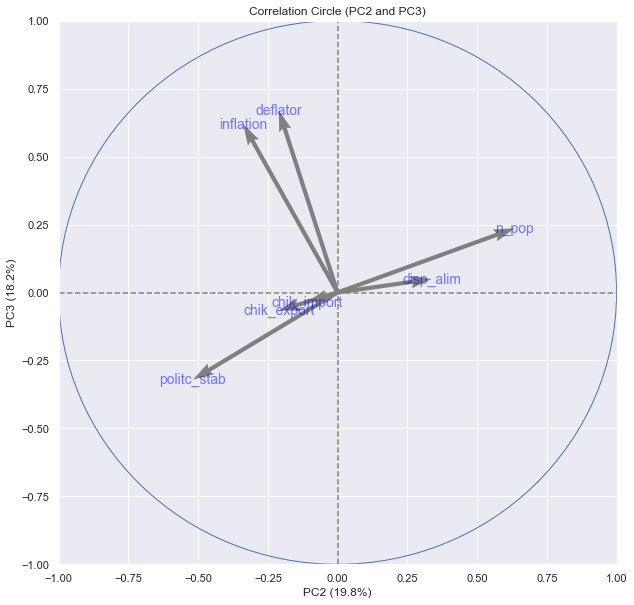

In [36]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(X.columns),) 

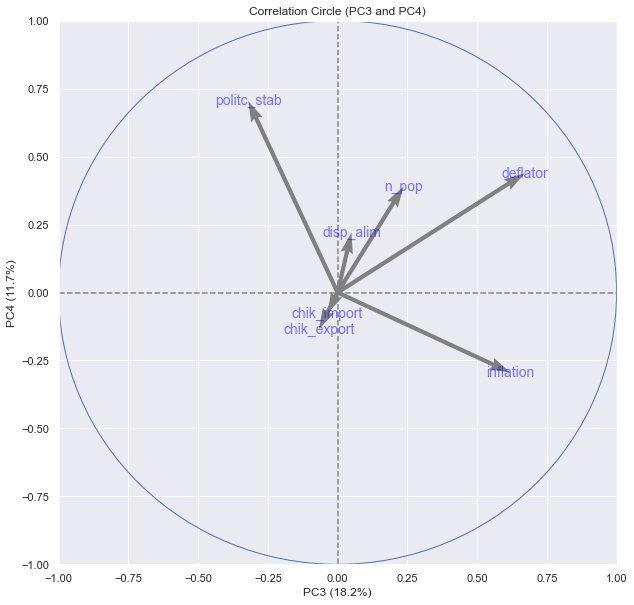

In [37]:
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(2,3)], labels = np.array(X.columns),) 

# Individuals Factor Map <a class="anchor" id="section_3_4"></a>


Note 
- also i  plot our samples on a scatter plot in the new factorial planes.  I did this to show that the principal components found with this unsupervised approach have value as representative components of the original data.

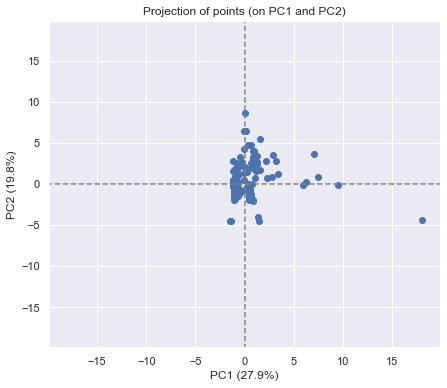

In [38]:
# Transform the original scaled data to the new vector space

X_projected = pca.transform(X_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])
plt.show()

- some recap

The explained variance ratio is an array of the variance of the data explained by each of the principal components in your data. It can be expressed as a cumulative sum.
Scree plots is a visual way to determine how many of the principal components you would like to retain in your analysis. 
Correlation scores show how much each variable influences the principal component.They can be plotted on a correlation circle. 
An individual factors map is used to check your work and to determine if the PCA transformation accurately represents the original data. 

---------------

# K-means Clustring <a class="anchor" id="chapter4"></a>


- K-means can only work with quantitative data, so we will remove country.

- In addition, we will remove the total_score and world_rank columns as they are the totals and rank for the table as a whole. We are really interested in analyzing the underlying metrics that contribute to the overall score.

- so i filter the  data down to just the remaining columns of interest:

# Find the number of clusters<a class="anchor" id="section_1_4"></a>




In [39]:
K_dat = new_df
K_dat.head()

politc_stab        n_pop   inflation    deflator   chik_export  \
Zone                                                                          
Arm?nie           -27.61        0.000    0.000000  12147.6220  1.420200e+04   
Arménie             0.00    26206.320    0.000000      0.0000  0.000000e+00   
Albanie           114.84  2587331.934    0.000000  87499.5453  9.298800e+04   
Afghanistan         0.00        0.000  667.476253      0.0000  3.335268e+07   
Alg?rie          -124.08        0.000    0.000000  11080.6020  0.000000e+00   

              chik_import    disp_alim  
Zone                                    
Arm?nie      2.126240e+05     0.000000  
Arménie      0.000000e+00    96.650000  
Albanie      1.267769e+07  8568.000000  
Afghanistan  3.312096e+07  3034.928804  
Alg?rie      4.808000e+04     0.000000

In [40]:
K_dat.isnull().sum()

politc_stab    0
n_pop          0
inflation      0
deflator       0
chik_export    0
chik_import    0
disp_alim      0
dtype: int64

In [41]:
K_dat.duplicated().sum()

0

- Again, I will apply the standard scaler to scale my data so that all variables have a mean of 0 and a standard deviation of 1.



In [42]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(K_dat)
X_scaled

array([[-0.15927398, -0.23452146, -0.33764773, ..., -0.70460498,
        -0.60436999, -0.69750072],
       [-0.07164859, -0.23249837, -0.33764773, ..., -0.70507139,
        -0.61023542, -0.67646014],
       [ 0.29281717, -0.03478383, -0.33764773, ..., -0.70201758,
        -0.26050979,  1.1677419 ],
       ...,
       [-0.07164859, -0.23452146,  0.90020204, ...,  0.39025949,
         0.30343635, -0.03680061],
       [-0.05752184,  0.30151605,  4.32404624, ..., -0.70507139,
        -0.61023346, -0.69750072],
       [-0.05752184,  0.30151605,  4.32404624, ..., -0.66608895,
        -0.55861893, -0.69750072]])

- So, thus far I've treated the data in exactly the same way we did for PCA.

--------

# Performing a K-means Clustering
<a class="anchor" id="section_2_4"></a>










- Now I can perform the k-means clustering, I will  ask for 3 clusters (the  n_clusters  parameter) and ask for clustering to be performed 10 times, starting with different centroids (this is the  n_init  parameter).  In this way, I can ask the algorithm to give me the best of the 10 runs.

In [43]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

- then I will add a new column, cluster number to the original data so we can see what universities sit in what cluster:



In [44]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=K_dat.columns, index=K_dat.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered


politc_stab     n_pop  inflation   deflator  chik_export  \
Zone                                                                    
Arm?nie        -0.159274 -0.234521  -0.337648  -0.065377    -0.704605   
Arménie        -0.071649 -0.232498  -0.337648  -0.065792    -0.705071   
Albanie         0.292817 -0.034784  -0.337648  -0.062802    -0.702018   
Afghanistan    -0.071649 -0.234521   0.323703  -0.065792     0.390259   
Alg?rie        -0.465439 -0.234521  -0.337648  -0.065413    -0.705071   
...                  ...       ...        ...        ...          ...   
Samoa          -0.071649 -0.234521  -0.085480  -0.065792     0.390259   
Y?men          -0.071649 -0.234521   0.887839  -0.065792     0.390259   
Zambie         -0.071649 -0.234521   0.900202  -0.065792     0.390259   
?les F?ro?     -0.057522  0.301516   4.324046  15.362279    -0.705071   
Chine          -0.057522  0.301516   4.324046  15.362279    -0.666089   

             chik_import  disp_alim  cluster  
Zone                                          
Arm?nie        -0.604370  -0.697501        1  
Arménie        -0.610235  -0.676460        1  
Albanie        -0.260510   1.167742        1  
Afghanistan     0.303436  -0.036801        1  
Alg?rie        -0.608909  -0.697501        1  
...                  ...        ...      ...  
Samoa           0.303436  -0.036801        1  
Y?men           0.303436  -0.036801        1  
Zambie          0.303436  -0.036801        1  
?les F?ro?     -0.610233  -0.697501        0  
Chine          -0.558619  -0.697501        0  

[474 rows x 8 columns]

- so the I have performed a k-means clustering on my data. 

# Selecting the Number of Clusters

- Notice

- In the exercise above we decided to create 3 clusters. 

- There is no logic or magic number of clusters, but i can use a technique called the Elbow Method to help  with this question.  

- The Elbow Method runs multiple tests with different values for k, the number of clusters.  For each run it records the score, which is a measure of the in-cluster variance (in other words how tight the clusters are).  I can then plot the score against the number of clusters. 

- I've added a red arrow to identify the "elbow" in the curve. so we can see that the curve rises sharply from 1 up to around 5 clusters but starts flattening out. By about 15 clusters, the curve is very flat and nearly horizontal. What this means is that above around 10 clusters the additional reduction in variance (or increase in the "tightness" of the clusters) is reducing significantly for each additional cluster. So there is little point in choosing more than 10 clusters and the ideal number is probably somewhere between 5 and 10.

- finding a number recap for K-Mean clustr 

Selecting the number of clusters can be a bit of a guessing game, but the elbow method can be a useful guide
Use the  n_clusters  parameter in Python to ask for the number of clusters that I need



In [45]:
inertie = []
absax = []
i = 1
while i <= 20:
    km = KMeans(n_clusters=i, random_state= 1)
    km.fit(X_projected)
    inertie.append(km.inertia_)
    absax.append(i)
    i += 1


In [46]:

fig = px.line(y=inertie, x=absax, markers=True)
fig.update_layout(yaxis_title='Inertie',
                  xaxis_title='Nombre de clusters',
                  xaxis_range=[0, max(absax)])
fig.show()

# Visualize the k-means Clusters <a class="anchor" id="section_3_4"></a>



In [47]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)


In [48]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=K_dat.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf

PC1       PC2  cluster
Zone                                    
Arm?nie     -1.193189  0.041509        1
Arménie     -1.183470  0.005305        1
Albanie     -0.038819  0.523548        1
Afghanistan  0.407510 -0.335267        1
Alg?rie     -1.207334  0.200777        1
...               ...       ...      ...
Samoa        0.370962 -0.196833        1
Y?men        0.457897 -0.526123        1
Zambie       0.459002 -0.530306        1
?les F?ro?  -1.446195 -4.498189        0
Chine       -1.390960 -4.512076        0

[474 rows x 3 columns]

In [49]:
clus1 = X_scaled_clustered[X_scaled_clustered['cluster']== 0]
clus2 = X_scaled_clustered[X_scaled_clustered['cluster']== 1]
clus3 = X_scaled_clustered[X_scaled_clustered['cluster']== 2]

In [50]:
clus3.head()

politc_stab     n_pop  inflation  deflator  chik_export  \
Zone                                                                 
Bulgarie      0.757825  0.263619  -0.337648 -0.062880     6.294563   
Canada        3.390776  2.489532  -0.337648 -0.062548     1.064007   
Malaisie      0.248830  1.591904  -0.337648 -0.062889     8.370211   
Slovaquie     2.850361  0.180365  -0.337648 -0.062443    14.329829   
Ukraine      -3.263866  2.865586  -0.337648 -0.062980    -0.642710   

           chik_import  disp_alim  cluster  
Zone                                        
Bulgarie      0.028153   4.986160        2  
Canada       10.670202   3.977989        2  
Malaisie     -0.281800   1.748005        2  
Slovaquie    12.346065   3.546553        2  
Ukraine       9.560954   2.963351        2

- We now have all our universities and the 8 variables mapped onto a 2D vector space.  We can quickly confirm this, showing the PCs and clusters against the universities:

- apply the same PCA transformation that we gave to the actual data points, so that they can appear in the new 2 dimensional PCA space:



In [51]:
centres_reduced = pca.transform(kmeans.cluster_centers_)
centres_reduced

array([[ 3.97570228e-03, -4.35010158e+00],
       [-1.16963028e-01,  3.69714851e-02],
       [ 9.04249038e+00,  4.09395327e-02]])

- Now we can display the data points and centroids (as black crosses):

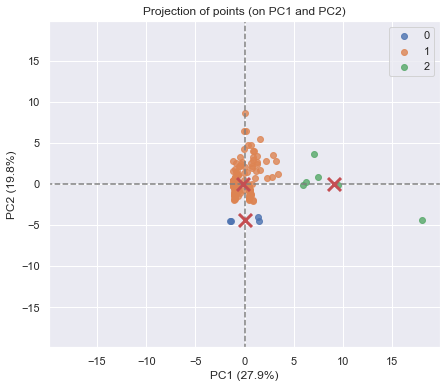

In [52]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var =clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

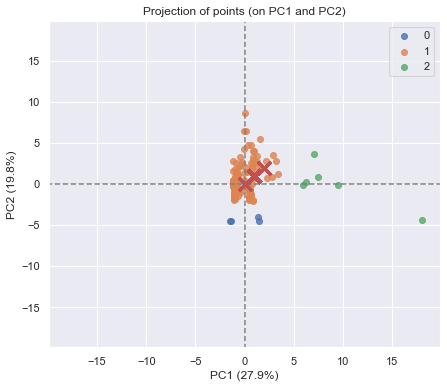

In [53]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var =clusters, alpha = 0.8)
plt.scatter(X_reduceddf['cluster'], X_reduceddf['cluster'],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# Displaying clusters on a world map

- To create the map, we need to associate each country with the cluster it is part of.

- We then need to know the ISO 3 code for each country to generate the graph, so we use a data table that allows us to make this connection. 

In [54]:
countries = X_reduceddf.reset_index('Zone')
country_clustered= countries[['Zone', 'cluster']]
country_clustered

Zone  cluster
0        Arm?nie        1
1        Arménie        1
2        Albanie        1
3    Afghanistan        1
4        Alg?rie        1
..           ...      ...
469        Samoa        1
470        Y?men        1
471       Zambie        1
472   ?les F?ro?        0
473        Chine        0

[474 rows x 2 columns]

In [55]:
code_count = pd.read_csv("world.csv")
code_count

id alpha2 alpha3              name
0      4     af    afg       Afghanistan
1    710     za    zaf    Afrique du Sud
2    248     ax    ala        Îles Åland
3      8     al    alb           Albanie
4     12     dz    dza           Algérie
..   ...    ...    ...               ...
244  704     vn    vnm          Viêt Nam
245  876     wf    wlf  Wallis-et-Futuna
246  887     ye    yem             Yémen
247  894     zm    zmb            Zambie
248  716     zw    zwe          Zimbabwe

[249 rows x 4 columns]

In [56]:
code_country = code_count.rename(columns= {'name': 'Zone'})
code_country


id alpha2 alpha3              Zone
0      4     af    afg       Afghanistan
1    710     za    zaf    Afrique du Sud
2    248     ax    ala        Îles Åland
3      8     al    alb           Albanie
4     12     dz    dza           Algérie
..   ...    ...    ...               ...
244  704     vn    vnm          Viêt Nam
245  876     wf    wlf  Wallis-et-Futuna
246  887     ye    yem             Yémen
247  894     zm    zmb            Zambie
248  716     zw    zwe          Zimbabwe

[249 rows x 4 columns]

In [57]:
code_country

id alpha2 alpha3              Zone
0      4     af    afg       Afghanistan
1    710     za    zaf    Afrique du Sud
2    248     ax    ala        Îles Åland
3      8     al    alb           Albanie
4     12     dz    dza           Algérie
..   ...    ...    ...               ...
244  704     vn    vnm          Viêt Nam
245  876     wf    wlf  Wallis-et-Futuna
246  887     ye    yem             Yémen
247  894     zm    zmb            Zambie
248  716     zw    zwe          Zimbabwe

[249 rows x 4 columns]

In [58]:
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
import pycountry_convert as pc


In [59]:
# merge 
cond_contry_ = code_country.merge(country_clustered,
                                 how = 'left', on = 'Zone')
cond_contry_

id alpha2 alpha3            Zone  cluster
0      4     af    afg     Afghanistan      1.0
1    710     za    zaf  Afrique du Sud      1.0
2    710     za    zaf  Afrique du Sud      1.0
3    248     ax    ala      Îles Åland      NaN
4      8     al    alb         Albanie      1.0
..   ...    ...    ...             ...      ...
337  887     ye    yem           Yémen      1.0
338  894     zm    zmb          Zambie      1.0
339  894     zm    zmb          Zambie      1.0
340  716     zw    zwe        Zimbabwe      1.0
341  716     zw    zwe        Zimbabwe      0.0

[342 rows x 5 columns]

In [60]:
cond_contry_.isnull().sum()

id          0
alpha2      0
alpha3      0
Zone        0
cluster    58
dtype: int64

In [61]:
cond_contry_ = cond_contry_.dropna()

In [62]:
cond_contry_

id alpha2 alpha3            Zone  cluster
0      4     af    afg     Afghanistan      1.0
1    710     za    zaf  Afrique du Sud      1.0
2    710     za    zaf  Afrique du Sud      1.0
4      8     al    alb         Albanie      1.0
5      8     al    alb         Albanie      1.0
..   ...    ...    ...             ...      ...
337  887     ye    yem           Yémen      1.0
338  894     zm    zmb          Zambie      1.0
339  894     zm    zmb          Zambie      1.0
340  716     zw    zwe        Zimbabwe      1.0
341  716     zw    zwe        Zimbabwe      0.0

[284 rows x 5 columns]

In [63]:
cond_contry_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 341
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       284 non-null    int64  
 1   alpha2   284 non-null    object 
 2   alpha3   284 non-null    object 
 3   Zone     284 non-null    object 
 4   cluster  284 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.3+ KB


In [64]:
cond_contry_ = cond_contry_.drop_duplicates()

In [65]:
cond_contry_.isnull().sum()

id         0
alpha2     0
alpha3     0
Zone       0
cluster    0
dtype: int64

In [66]:
import plotly.express as px
n_cluster = 3
fig = px.scatter_geo(cond_contry_, locations="alpha2",
                     color="cluster", hover_name="Zone", category_orders={'Cluster': np.array([(n+1) for n in range(n_cluster)]).astype(str)})
fig.update_layout(title='Carte des clusters',
                  title_x=0.7)
fig.show()

- But what do these clusters actually represent? The clustering algorithm has not given any indication as to what these 3 groups are. Unfortunately, there is no magic approach here. We need to examine the clusters and determine a sensible way to interpret them. This boils down to summarizing the samples within each cluster, or characterizing the clusters. Fortunately, we can use some tools to help us.


# Parallel Coordinates Plot
 <a class="anchor" id="section_4_4"></a>






- We can use a parallel coordinates plot to see how individual data points sit across all our variables. In the following chart, each color represents a different cluster. By looking at how the values for the variables compare across the clusters we can get a feel for what the clusters actually represent.

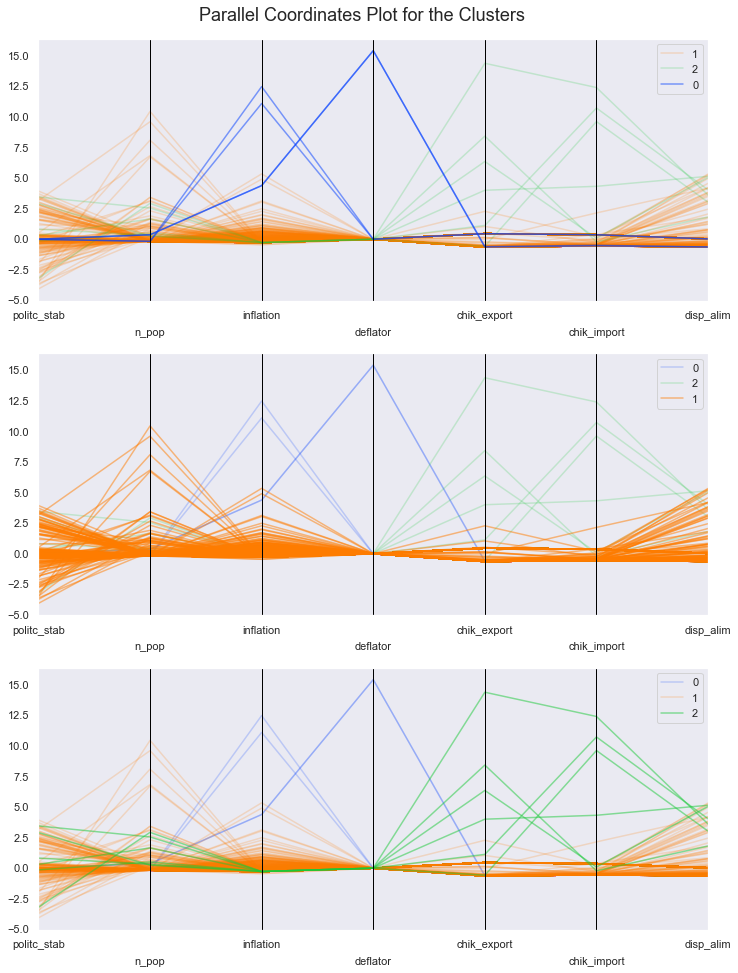

In [67]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=K_dat.index, columns=K_dat.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

# Interpreting the Meaning of the ClustersWe can identify some groupings: 

   -  Blue samples (cluster 0) with high ranking for number of population and consuming of (dsipo alim, prot+fat) and a high proportion of food inflation.
   
   
   
   - Orange samples (cluster 1) with a high ranking of political stability  and inflation , dispo_alim is low 
   
   - Green samples (cluster 2), with high ranking fo deflator and low ranking with other variables

# Countries that belong to each cluster  using dondrogram  <a class="anchor" id="section_5_4"></a>





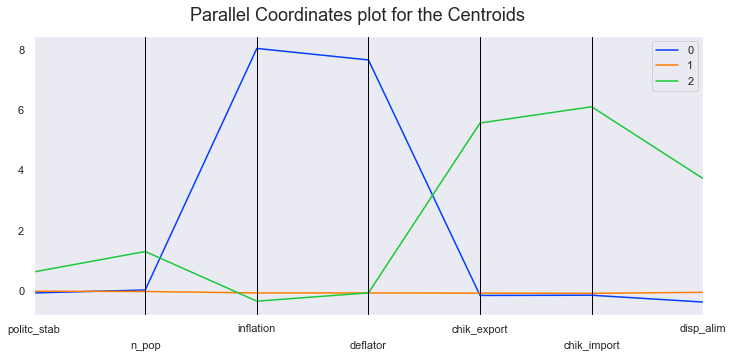

In [68]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=K_dat.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

- Notes: 
    - Interpreting the meaning of k-means clusters boils down to characterizing the clusters. 
-   A Parallel Coordinates Plot allows us to see how individual data points sit across all variables. By looking at how the values for each variable compare across clusters, we can get a sense of what each cluster represents. 


# Hierarchical clustering  <a class="anchor" id="chapter5"></a>


    



the algorethm
- Place each data point into a cluster of its own. 

- LOOP
    Compute the distance between every cluster and every other cluster. 
    Merge the two clusters that are closest together into a single cluster.
- UNTIL we have only one cluster

- Loading, cleaning and standardizing the data


In [69]:
HirK_dat = df_x
HirK_dat

politc_stab         n_pop    inflation      deflator  \
Zone                                                                
Arm?nie       -27.610000  0.000000e+00     0.000000  1.214762e+04   
Arménie         0.000000  2.620632e+04     0.000000  0.000000e+00   
Afghanistan -2561.130000  3.293063e+07     0.000000  9.586098e+04   
Albanie       114.840000  2.587332e+06     0.000000  8.749955e+04   
Afghanistan     0.000000  0.000000e+00   667.476253  0.000000e+00   
...                  ...           ...          ...           ...   
Samoa           0.000000  0.000000e+00   254.502774  0.000000e+00   
Y?men           0.000000  0.000000e+00  1236.836936  0.000000e+00   
Zambie          0.000000  0.000000e+00  1249.314359  0.000000e+00   
?les F?ro?      4.451216  6.943644e+06  4704.869180  4.514212e+08   
Chine           4.451216  6.943644e+06  4704.869180  4.514212e+08   

              chik_export   chik_import    disp_alim  
Zone                                                  
Arm?nie      1.420200e+04  2.126240e+05     0.000000  
Arménie      0.000000e+00  0.000000e+00    96.650000  
Afghanistan  3.328000e+03  5.706428e+06  1714.880000  
Albanie      9.298800e+04  1.267769e+07  8568.000000  
Afghanistan  3.335268e+07  3.312096e+07  3034.928804  
...                   ...           ...          ...  
Samoa        3.335268e+07  3.312096e+07  3034.928804  
Y?men        3.335268e+07  3.312096e+07  3034.928804  
Zambie       3.335268e+07  3.312096e+07  3034.928804  
?les F?ro?   0.000000e+00  7.100000e+01     0.000000  
Chine        1.187010e+06  1.871118e+06     0.000000  

[510 rows x 7 columns]

In [70]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(HirK_dat)
X_scaled

array([[-7.36381754e-02, -1.30174233e-01, -4.75143984e-02, ...,
        -1.68584704e-01, -1.47024714e-01, -5.93678971e-01],
       [-1.02580561e-02, -1.29684856e-01, -4.75143984e-02, ...,
        -1.68632202e-01, -1.47651708e-01, -5.81172902e-01],
       [-5.88945852e+00,  4.84772935e-01, -4.75143984e-02, ...,
        -1.68621072e-01, -1.30824361e-01, -3.71781327e-01],
       ...,
       [-1.02580561e-02, -1.30174233e-01, -3.49468771e-02, ...,
        -5.70856094e-02, -4.99832632e-02, -2.00973037e-01],
       [-4.00705316e-05, -5.08493099e-04, -1.85603119e-04, ...,
        -1.68632202e-01, -1.47651499e-01, -5.93678971e-01],
       [-4.00705316e-05, -5.08493099e-04, -1.85603119e-04, ...,
        -1.64662299e-01, -1.42134079e-01, -5.93678971e-01]])

# Performing a hierarchical clustering<a class="anchor" id="section_5_1"></a>





- First I ask the algorithm to produce the full hierarchical cluster tree.


In [71]:

# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

-  Next, we will ask the algorithm to find 3 clusters from the tree:

In [72]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=3)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # count of data points in each cluster


array([507,   2,   1])

- One of the advantages of hierarchical clustering is that we can now change how many clusters we want just by "reading off" the required number from the tree:



In [73]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=HirK_dat.columns, index=HirK_dat.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered

politc_stab     n_pop  inflation  deflator  chik_export  \
Zone                                                                   
Arm?nie        -0.073638 -0.130174  -0.047514 -0.044500    -0.168585   
Arménie        -0.010258 -0.129685  -0.047514 -0.044501    -0.168632   
Afghanistan    -5.889459  0.484773  -0.047514 -0.044492    -0.168621   
Albanie         0.253363 -0.081858  -0.047514 -0.044492    -0.168321   
Afghanistan    -0.010258 -0.130174  -0.040800 -0.044501    -0.057086   
...                  ...       ...        ...       ...          ...   
Samoa          -0.010258 -0.130174  -0.044954 -0.044501    -0.057086   
Y?men          -0.010258 -0.130174  -0.035072 -0.044501    -0.057086   
Zambie         -0.010258 -0.130174  -0.034947 -0.044501    -0.057086   
?les F?ro?     -0.000040 -0.000508  -0.000186 -0.000174    -0.168632   
Chine          -0.000040 -0.000508  -0.000186 -0.000174    -0.164662   

             chik_import  disp_alim  cluster  
Zone                                          
Arm?nie        -0.147025  -0.593679        0  
Arménie        -0.147652  -0.581173        0  
Afghanistan    -0.130824  -0.371781        0  
Albanie        -0.110267   0.514981        0  
Afghanistan    -0.049983  -0.200973        0  
...                  ...        ...      ...  
Samoa          -0.049983  -0.200973        0  
Y?men          -0.049983  -0.200973        0  
Zambie         -0.049983  -0.200973        0  
?les F?ro?     -0.147651  -0.593679        0  
Chine          -0.142134  -0.593679        0  

[510 rows x 8 columns]

In [74]:
clus1 = X_scaled_clustered[X_scaled_clustered['cluster']== 0]
clus1 = X_scaled_clustered[X_scaled_clustered['cluster']== 1]
clus2 = X_scaled_clustered[X_scaled_clustered['cluster']== 2]

# Visualize the hierarchical clusters <a class="anchor" id="chapter_5_2"></a>








In [75]:
# Find the size of the clusters
X_scaled_clustered["cluster"].value_counts()

0    507
1      2
2      1
Name: cluster, dtype: int64

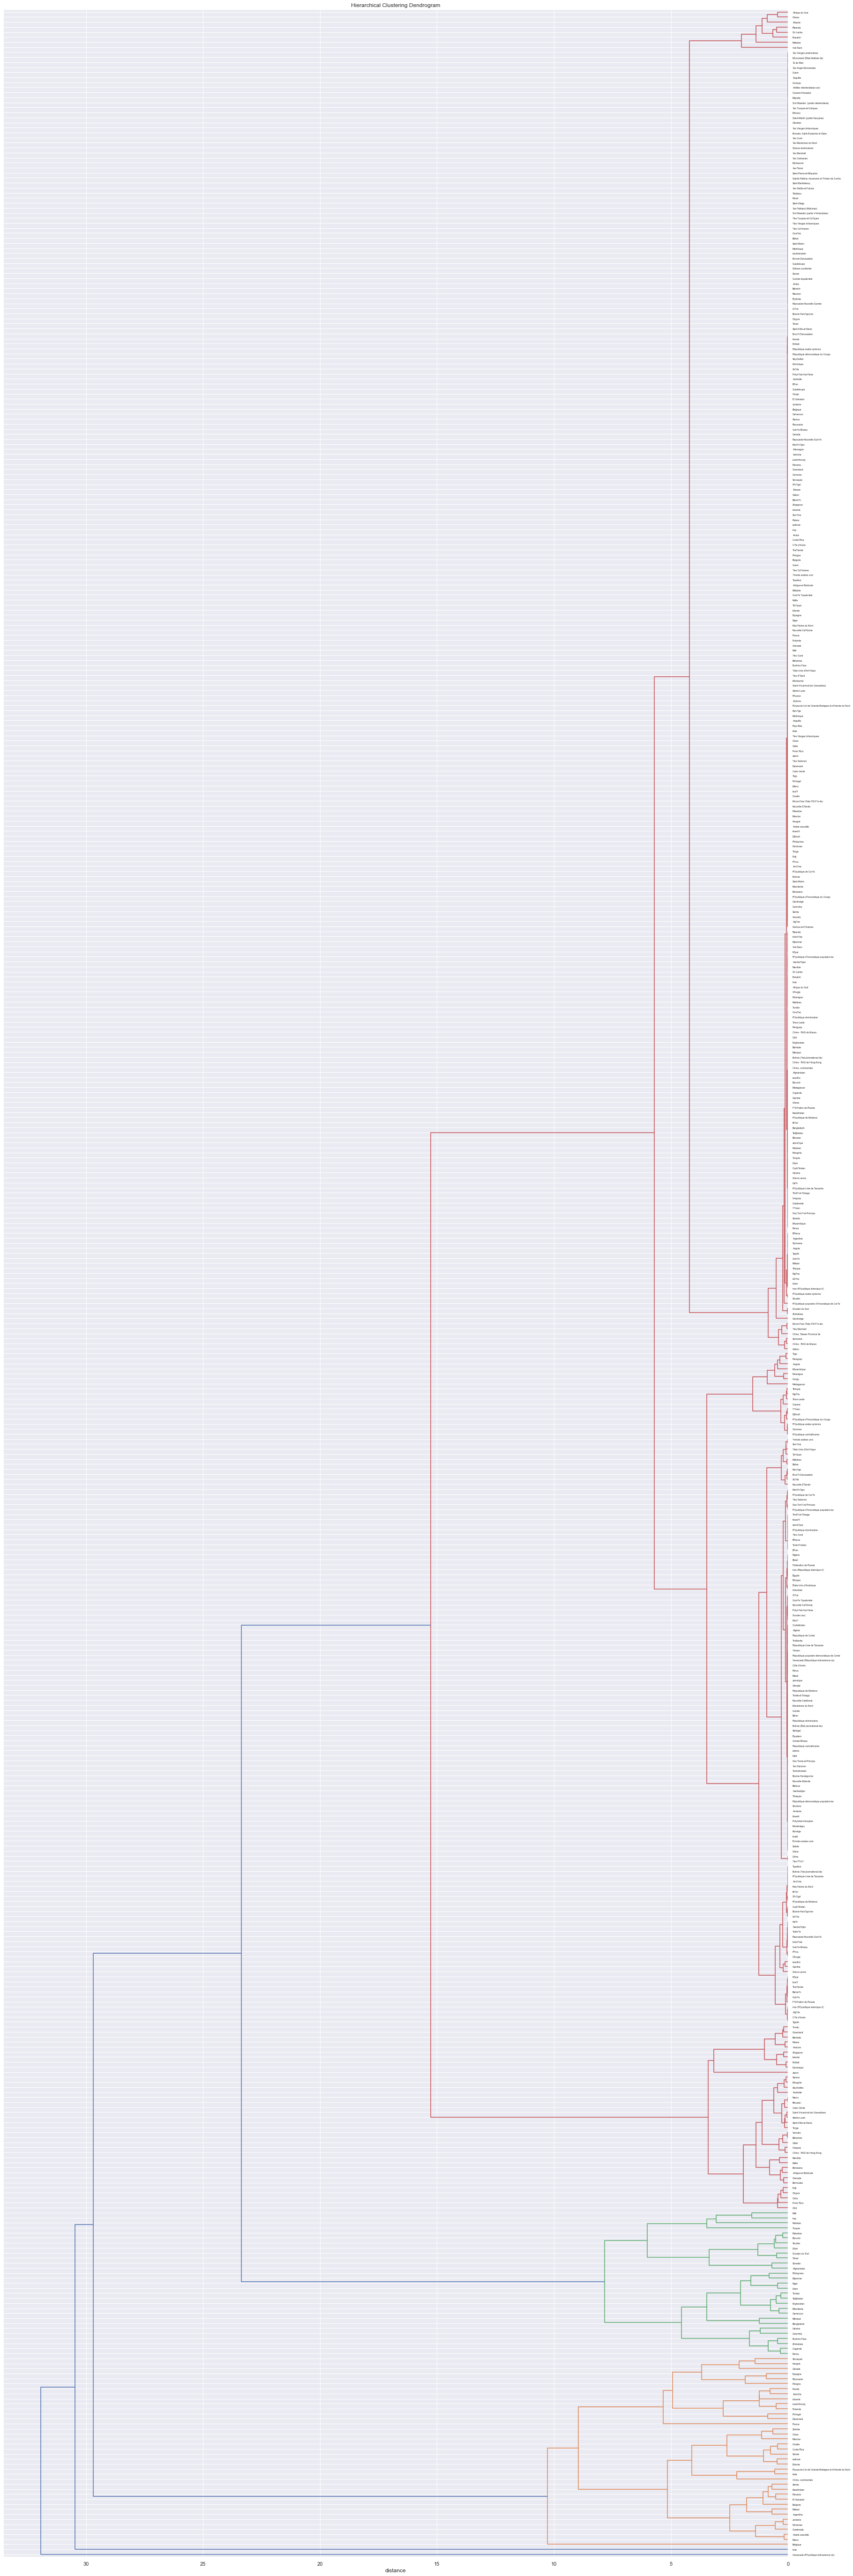

In [76]:
# Show a dendrogram, just for the smallest cluster
from scipy.cluster.hierarchy import linkage, fcluster 
sample = X_scaled_clustered[X_scaled_clustered.cluster==0]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(30,100))

In [77]:
# all country in blue cluster (0) have hight ranking for number of population and high consuming for proten 
# all coutnry in orange cluster (1) have high ranking of 

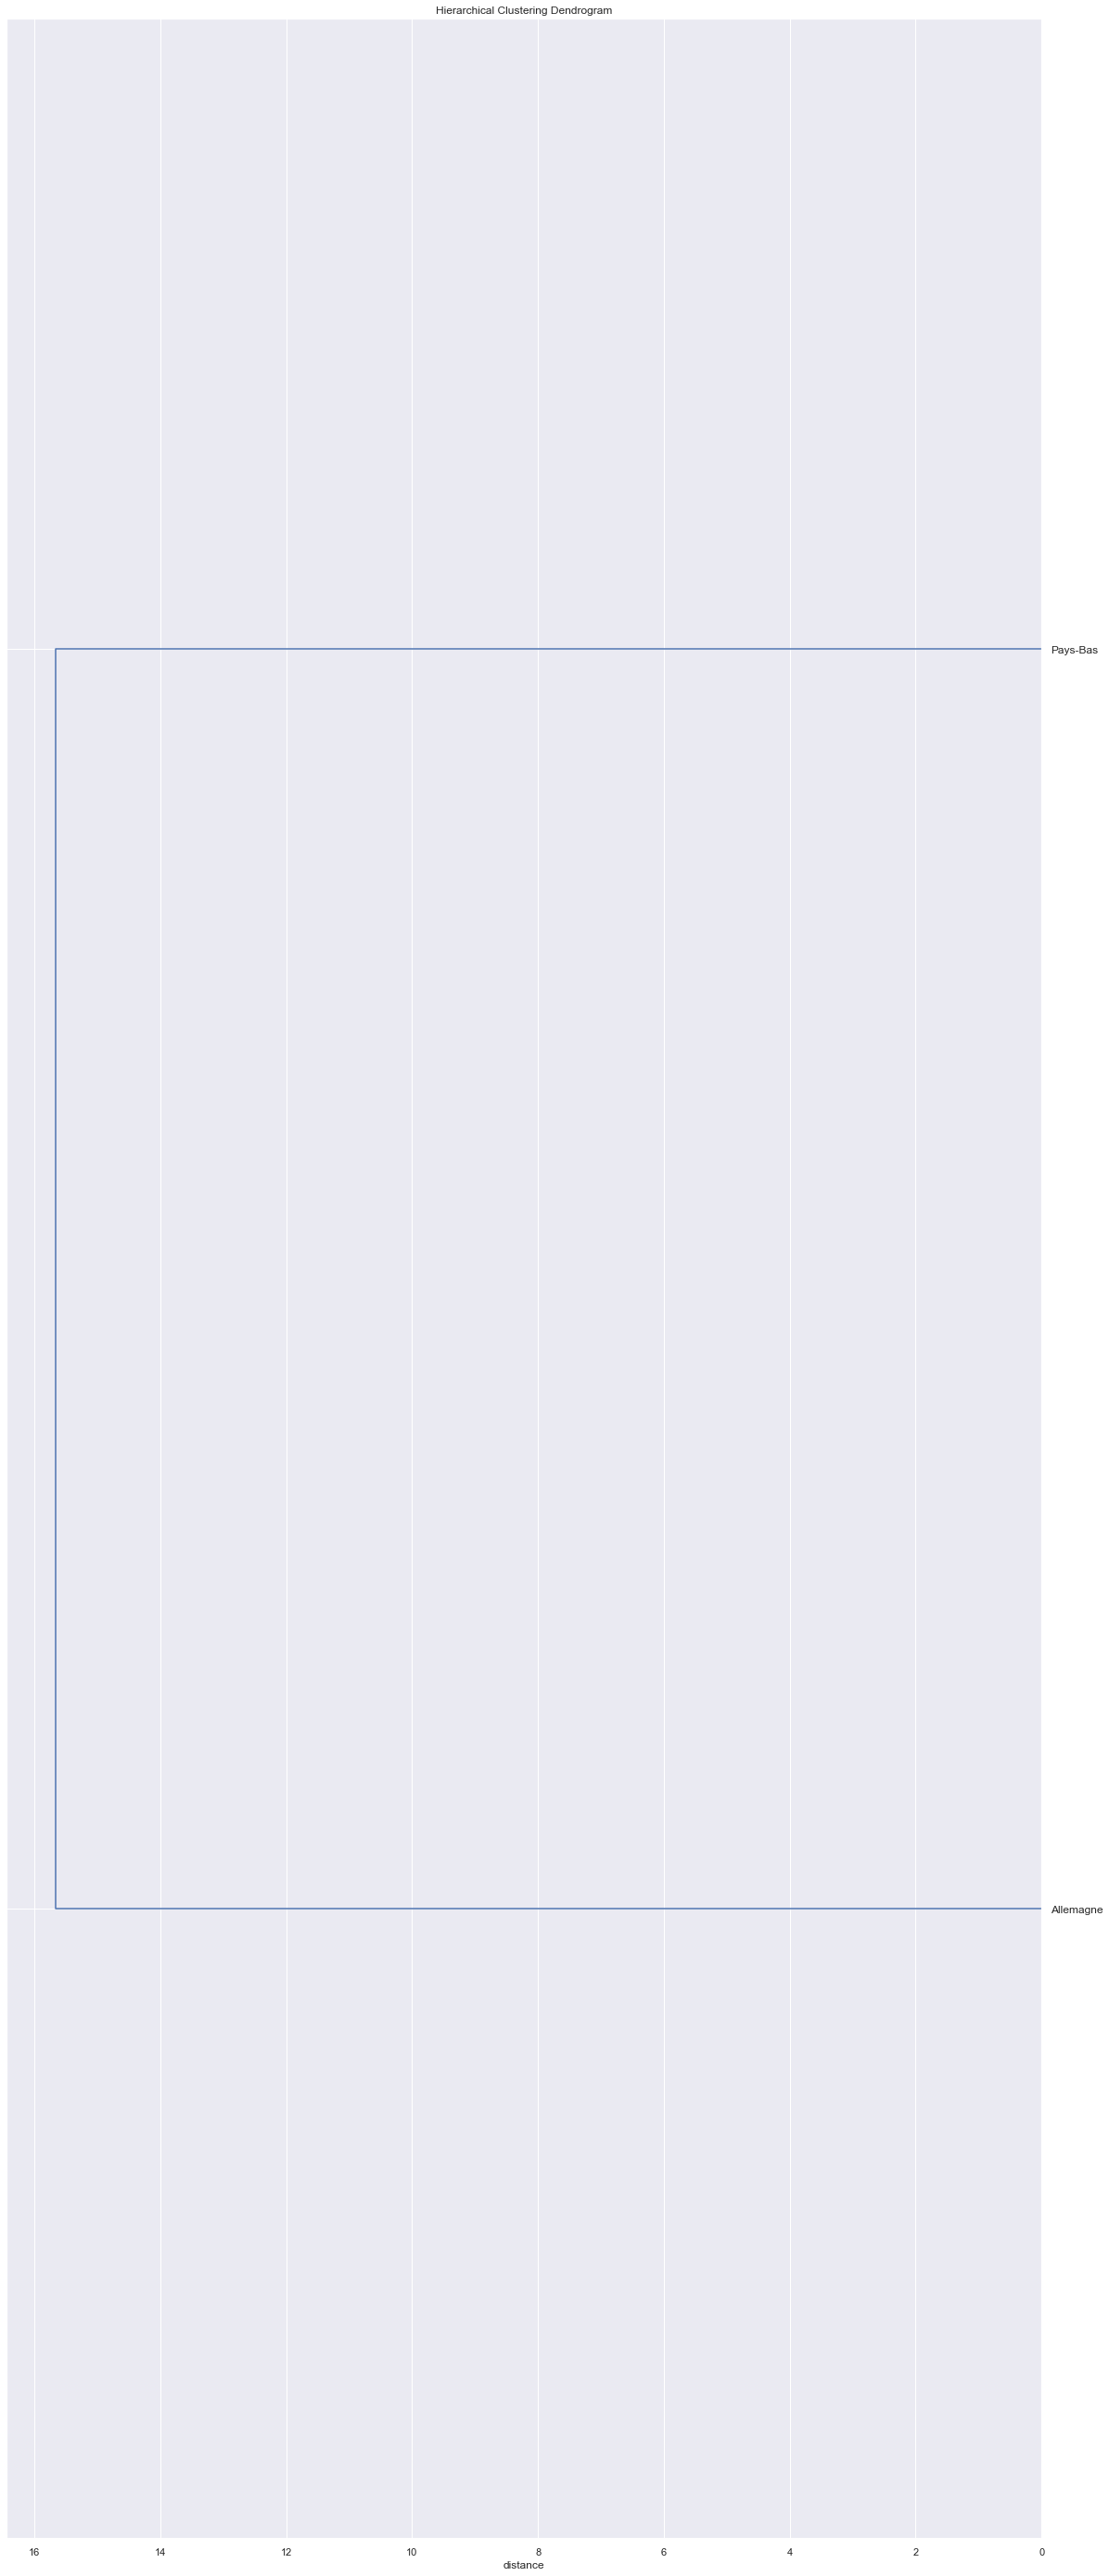

In [78]:
sample = X_scaled_clustered[X_scaled_clustered.cluster==1]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(20,50 ))

In [79]:
#display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)

# Interpreting the Meaning of hierarchical  Clusters 
<a class="anchor" id="section_5_3"></a>







    

- But what do these clusters actually represent? As with k-means, the clustering algorithm has not given any indication as to what these 4 groups are. Again, we need to examine the clusters and determine a sensible way to interpret them.


# Parallel Coordinates Plot

- As we did with k-means, we can use a parallel coordinates plot to see how individual data points sit across all our variables. Here is the code to do that:

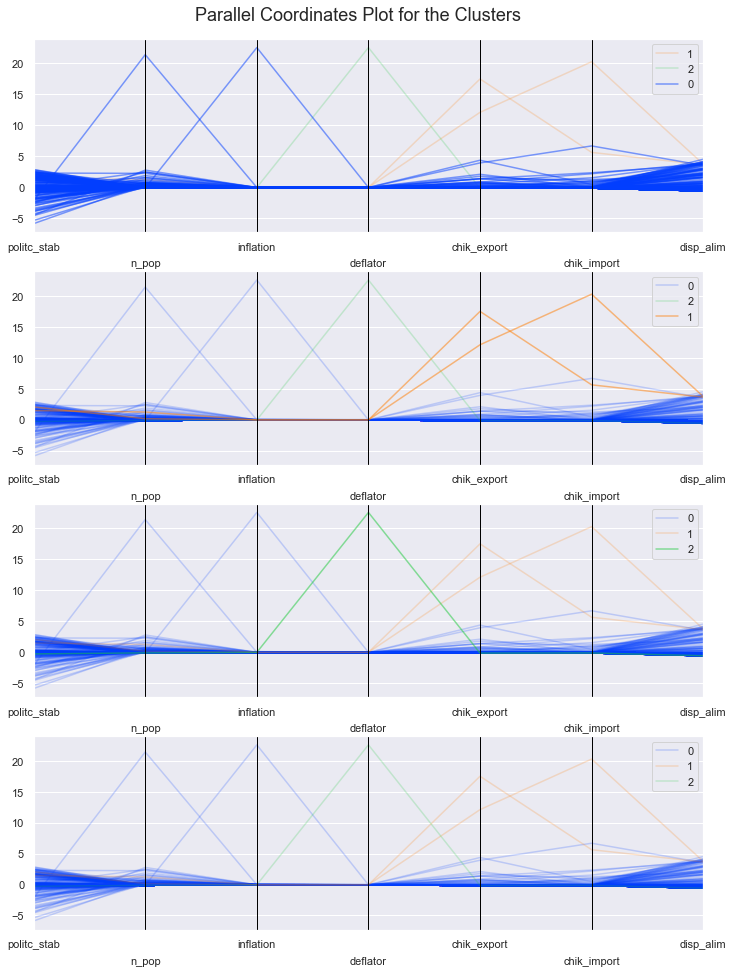

In [80]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=HirK_dat.index, columns=HirK_dat.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 4)

However, as we saw with k-means, by characterising each group in a single data point we can sometimes get a clearer picture.  
The k-means algorithm gave us the centroids, which we could use for this purpose.

The hierarchical clustering algorithm doesn't give us back the centroids, but we can compute them ourselves by taking the mean of each variable in each cluster:

In [81]:
means =  X_clustered.groupby(by="cluster").mean()

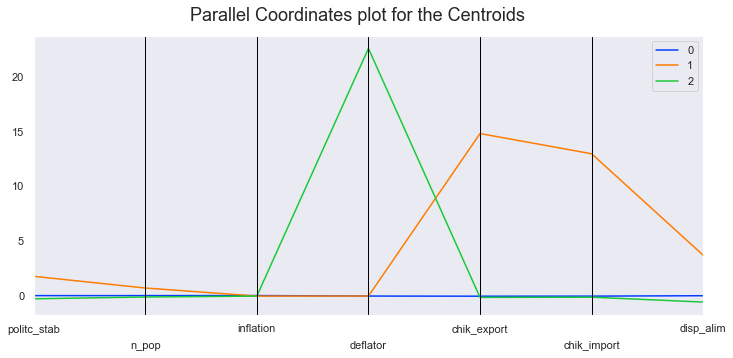

In [82]:
display_parallel_coordinates_centroids(means.reset_index(), 4)

# Box Plots <a class="anchor" id="section_5_4_"></a>



    
- Another way to understand the clusters is to produce boxplots for each variable within each cluster:



array([[<AxesSubplot:title={'center':'chik_export'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'chik_import'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'deflator'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'disp_alim'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'inflation'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'n_pop'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'politc_stab'}, xlabel='[cluster]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

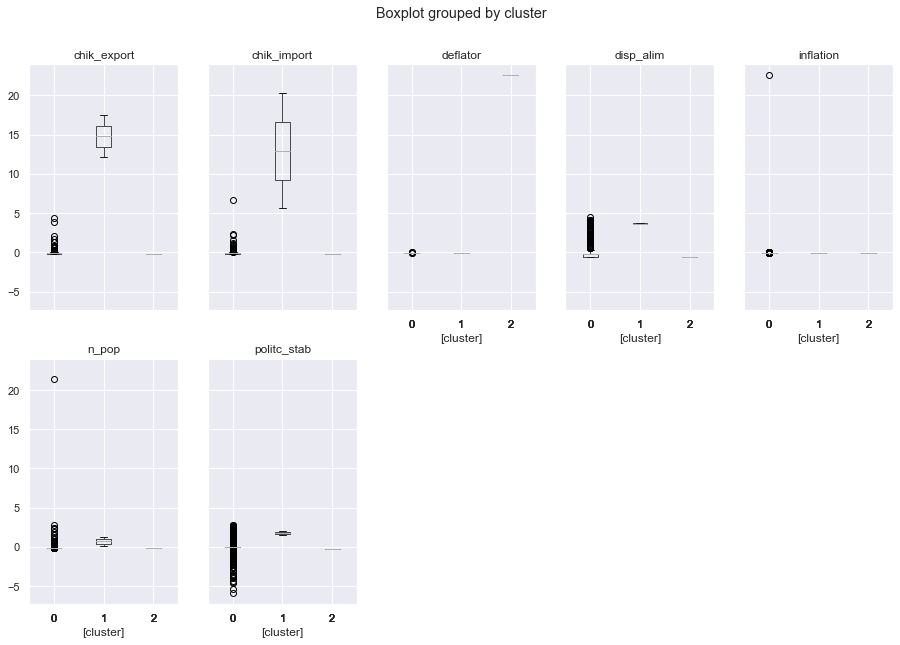

In [83]:
X_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,5))

In [84]:
# we could see that cluster two in all expete the food inflation  , and chkiken price , chiken import 

Notes

Kmeans

The k-means algorithm converges in general very quickly. It is not uncommon for it to reach convergence after 10 iterations, even with many data points.

However, you can't guarantee to find the "optimal" set of clusters. The results depend on the initial set of centroids. This is why, generally, we run the algorithm several times and select the best result (the one with the smallest overall variance).

Also, k-means cannot determine the optimal number of clusters. It needs to be specified. However, again, we can run the algorithm several times, with different values of k, and identify at what point the intra-cluster distances don't improve significantly. This is the elbow method, which we saw earlier in the course.

Hierarchical

Hierarchical classification requires that distances between each and every point are calculated. If we have a large number of data points this can be very slow and require a lot of memory. Therefore, hierarchical clustering is best suited to small sample sizes.

However, unlike k-means, hierarchical classification does not require specifying a number of classes beforehand. We can ask the algorithm to generate the whole tree and then read off different numbers of classes.

# -    End   -